1Regression Hitters

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

In [8]:
from sklearn.model_selection import train_test_split # for holdout cv
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error

In [10]:
Hitters = pd.read_csv('Hitters.csv')
Hitters[:5]

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,League,Division,PutOuts,Assists,Errors,Salary,NewLeague
0,293,66,1,30,29,14,1,293,66,1,30,29,14,A,E,446,33,20,NaN,A
1,315,81,7,24,38,39,14,3449,835,69,321,414,375,N,W,632,43,10,475.0,N
2,479,130,18,66,72,76,3,1624,457,63,224,266,263,A,W,880,82,14,480.0,A
3,496,141,20,65,78,37,11,5628,1575,225,828,838,354,N,E,200,11,3,500.0,N
4,321,87,10,39,42,30,2,396,101,12,48,46,33,N,E,805,40,4,91.5,N


In [11]:
Hitters.shape

(322, 20)

In [12]:
Hitters1 = Hitters.dropna()
Hitters1.shape

(263, 20)

In [13]:
Hitters2 = Hitters1

In [15]:
x0 = Hitters2.drop(['Salary'],axis=1)
y = Hitters2.Salary

In [17]:
X = pd.get_dummies(x0,columns = ['League','Division','NewLeague'],
drop_first=True)

In [18]:
X_train,X_test,y_train,y_test = train_test_split(X,y,train_size=2/3,random_state=1)

In [19]:
print("Train Data shape:",X_train.shape)
print("Train Target shape:",y_train.shape)
print("Test Data shape:",X_test.shape)
print("Test Target shape:",y_test.shape)

Train Data shape: (175, 19)
Train Target shape: (175,)
Test Data shape: (88, 19)
Test Target shape: (88,)


In [20]:
mean = X_train.mean(axis=0) # Train data
X_train -= mean
X_test -= mean  # Test data

std = X_train.std(axis=0)
X_train /= std
X_test /= std

In [21]:
model1 = keras.Sequential([
 layers.Dense(64,activation='relu',input_shape=(19,)),
 layers.Dropout(0.4),
 layers.Dense(1) # output layer
])

model1.summary()
# There are 1345 parameters in total

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                1280      
                                                                 
 dropout (Dropout)           (None, 64)                0         
                                                                 
 dense_1 (Dense)             (None, 1)                 65        
                                                                 
Total params: 1,345
Trainable params: 1,345
Non-trainable params: 0
_________________________________________________________________


In [22]:
# Compile the model
model1.compile(optimizer='rmsprop',
               loss='mse',
               metrics=['mae'])

In [23]:
# Train the model
batch_size = 32
n_epochs = 1500

X_train = X_train.astype('float64')
y_train = y_train.astype('float64')

history = model1.fit(X_train, y_train, batch_size=batch_size,
                    verbose = 0, epochs=n_epochs, validation_split=0.2)

In [24]:
history_dict = history.history
history_dict.keys()

dict_keys(['loss', 'mae', 'val_loss', 'val_mae'])

In [25]:
loss = history.history['mae']
val_loss = history.history['val_mae']
df9 = pd.DataFrame(history_dict)
df9

,loss,mae,val_loss,val_mae
0,506986.125000,540.782043,493579.187500,560.827087
1,506307.156250,540.401001,493209.437500,560.580078
2,506203.531250,540.282898,492897.093750,560.370789
3,505739.656250,539.960876,492668.000000,560.204346
4,505435.187500,539.849365,492415.375000,560.027649
...,...,...,...,...
1495,95071.640625,225.291290,90360.796875,211.784912
1496,97118.015625,226.312943,90362.320312,211.694687
1497,98816.789062,229.111023,90374.757812,211.817841
1498,96423.085938,229.632660,90397.226562,211.862564


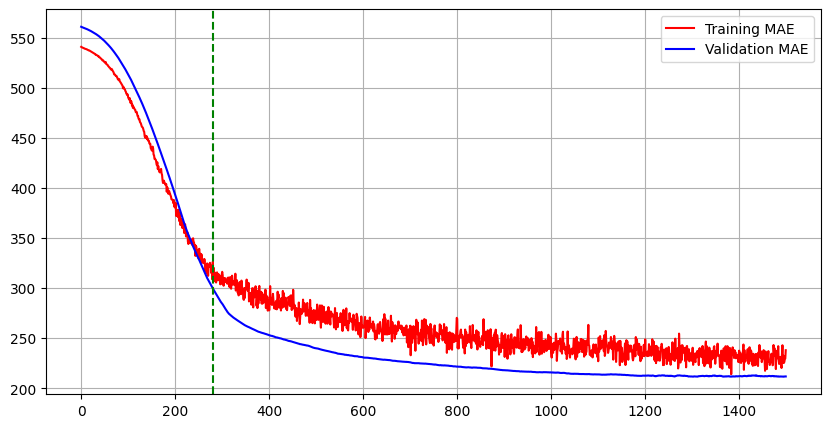

In [30]:
train_mae = history.history["mae"]
val_mae = history.history["val_mae"]

plt.figure(figsize=(10,5))
plt.plot(loss,"r",label="Training MAE")
plt.plot(val_loss,"b",label="Validation MAE")
plt.axvline(x=280,color = 'green',linestyle = 'dashed')
plt.legend()
plt.grid();  ## The model starts overfitting with the number of epchos of 280.

In [31]:
test_mse, test_mae = model1.evaluate(X_test,y_test)
test_mae

3/3 [==============================] - 0s 6ms/step - loss: 124664.3281 - mae: 261.2109


261.21087646484375